In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
file_path = 'PS_20174392719_1491204439457_log.csv'
data = pd.read_csv(file_path)

In [3]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
# Display basic dataset info
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
None


In [5]:
# Drop irrelevant columns (if any, like IDs or names)
if 'nameOrig' in data.columns and 'nameDest' in data.columns:
    data = data.drop(['nameOrig', 'nameDest'], axis=1)

In [6]:
# Handle missing values if any
data = data.dropna()


In [7]:
# Encode categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le  # Store encoders for future decoding if needed

In [8]:
# Identify target and features
target = 'isFraud'
features = [col for col in data.columns if col != target]

In [9]:
# Split data into features (X) and target (y)
X = data[features]
y = data[target]

In [10]:
# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [11]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [12]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
# Build the Neural Network model
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

In [14]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/10
254177/254177 ━━━━━━━━━━━━━━━━━━━━ 298s 1ms/step - accuracy: 0.9641 - loss: 0.0951 - val_accuracy: 0.9851 - val_loss: 0.0439
Epoch 2/10
254177/254177 ━━━━━━━━━━━━━━━━━━━━ 322s 1ms/step - accuracy: 0.9791 - loss: 0.0608 - val_accuracy: 0.9864 - val_loss: 0.0411
Epoch 3/10
254177/254177 ━━━━━━━━━━━━━━━━━━━━ 320s 1ms/step - accuracy: 0.9816 - loss: 0.0553 - val_accuracy: 0.9830 - val_loss: 0.0438
Epoch 4/10
254177/254177 ━━━━━━━━━━━━━━━━━━━━ 297s 1ms/step - accuracy: 0.9832 - loss: 0.0521 - val_accuracy: 0.9888 - val_loss: 0.0367
Epoch 5/10
254177/254177 ━━━━━━━━━━━━━━━━━━━━ 274s 1ms/step - accuracy: 0.9841 - loss: 0.0498 - val_accuracy: 0.9847 - val_loss: 0.0447
Epoch 6/10
254177/254177 ━━━━━━━━━━━━━━━━━━━━ 266s 1ms/step - accuracy: 0.9848 - loss: 0.0495 - val_accuracy: 0.9850 - val_loss: 0.0408
Epoch 7/10
254177/254177 ━━━━━━━━━━━━━━━━━━━━ 248s 976us/step - accuracy: 0.9853 - loss: 0.0492 - val_accuracy: 0.9892 - val_loss: 0.0338
Epoch 8/10
254177/254177 ━━━━━━━━━━━━━━━━━━━━ 

In [16]:
# Evaluate the model on the test set
y_pred = model.predict(X_test).flatten()
y_pred_class = (y_pred > 0.5).astype(int)

79431/79431 ━━━━━━━━━━━━━━━━━━━━ 35s 439us/step


In [17]:
# Print classification metrics
print("Classification Report:\n", classification_report(y_test, y_pred_class))
print("AUC-ROC Score:", roc_auc_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99   1270837
           1       0.99      0.99      0.99   1270926

    accuracy                           0.99   2541763
   macro avg       0.99      0.99      0.99   2541763
weighted avg       0.99      0.99      0.99   2541763

AUC-ROC Score: 0.9994102466868133


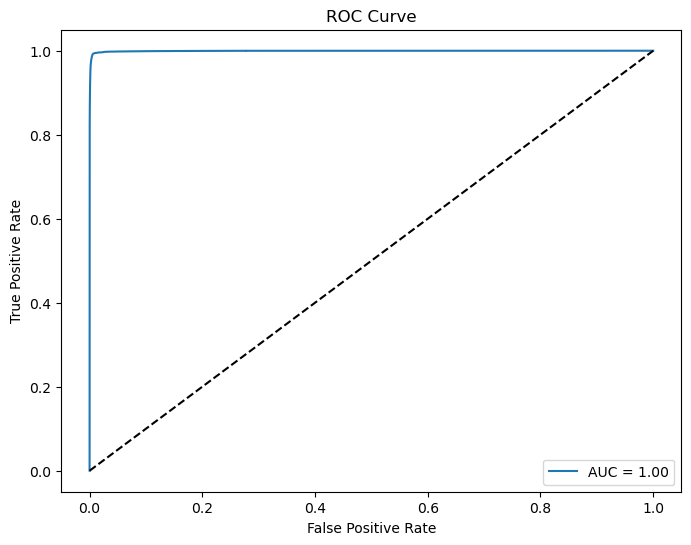

In [18]:
# Plot the ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_pred):.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()